<a href="https://colab.research.google.com/github/edison0828/generative_ai/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主題二、研究GAN背後原理，試著用自己的方式解釋Cross Entropy、KL divergence。

## 🤖 GAN 簡介

GAN (Generative Adversarial Network, 生成對抗網路) 透過兩個神經網路互相競爭的方式來生成非常逼真的假資料。

在GAN訓練時，我們必須要知道生成出來的資料和真實資料「有多接近」或「差距多大」，這時候就需要使用以下兩種工具：

- **Cross Entropy (交叉熵)**
- **KL Divergence (KL散度)**

接下來，我會用淺顯易懂的方式，搭配Python程式實驗，來理解這兩個指標的意義及差異


## 📌 Cross Entropy（交叉熵）是什麼？

Cross Entropy 是用來衡量「**預測的結果**」與「**真實答案**」之間差距的一種指標。

可以把它想像成 **「猜題目的誤差」**：

- ✅ 當你的答案越接近真實答案時，Cross Entropy 會越小。
- 🎯 當答案完全猜中時，Cross Entropy 會達到最小值。

---

## 🔹 Cross Entropy 的特性

Cross Entropy 衡量的是：

> **「我們用 \( q \) 來表示 \( p \) 這個分布，會造成多少誤差」**。

其數學公式為：
$$
H(p, q) = -\sum p(x) \log q(x)
$$

### ✅ Cross Entropy 的重要特性：
- **即使 \( p = q \)**，Cross Entropy 仍然等於 **真實分布 \( p \) 本身的熵值**：
  $$
  H(p, q) = H(p) = -\sum p(x) \log p(x)
  $$

- 這代表 **即使我們的預測 \( q \) 完全等於真實分布 \( p \)**，仍然會有一個基礎的資訊熵（因為 \( p \) 本身就有不確定性）。
- **如果 \( q \) 與 \( p \) 偏差變大**，Cross Entropy 會變大，表示預測誤差增加。

---


## 📌 KL Divergence（KL散度）是什麼？

KL Divergence 用來描述「**兩個機率分布之間的差距**」。

可以把它理解為 **「拿著真實答案來看預測答案差多少」**：

- ✅ 若兩者 **完全一樣**，KL Divergence 會是 **0**。
- 🔺 若 **差距越大**，KL Divergence 的數值就會 **越大**。

⚠️ **注意**：KL Divergence **有方向性（不對稱）**，A 到 B 的距離和 B 到 A 的距離 **不一定相等**！

---

## 🔹 KL Divergence 的特性

KL Divergence 衡量的是 **兩個機率分布之間的相對差異**：

$$
D_{KL}(p || q) = \sum p(x) \log \frac{p(x)}{q(x)}
$$

### ✅ KL Divergence 的重要特性：
- **如果 \( p = q \)**，則：
  
  $$
  \log \frac{p(x)}{q(x)} = \log 1 = 0
  $$

  所以 KL Divergence 變成：

  $$
  D_{KL}(p || q) = \sum p(x) \times 0 = 0
  $$

  **這代表兩個分布一模一樣，沒有任何資訊差異，因此 KL Divergence = 0**。

- **如果 \( q \) 與 \( p \) 不同**，KL Divergence 會變大，表示兩個分布的差異程度增加。

---


# 實驗

<ipython-input-6-f0963091f7c4>:16: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
<ipython-input-6-f0963091f7c4>:16: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


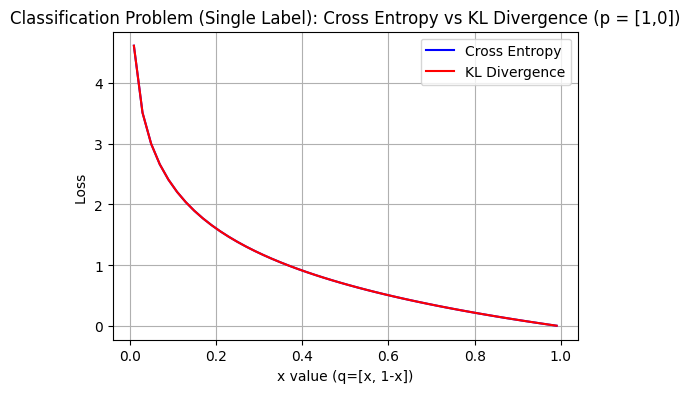

q 分布: [0.1 0.4 0.5], Cross Entropy: 0.9433, KL Divergence: 0.0000
q 分布: [0.2 0.3 0.5], Cross Entropy: 0.9891, KL Divergence: 0.0458
q 分布: [0.3 0.3 0.4], Cross Entropy: 1.0601, KL Divergence: 0.1168
q 分布: [0.5 0.3 0.2], Cross Entropy: 1.3556, KL Divergence: 0.4123


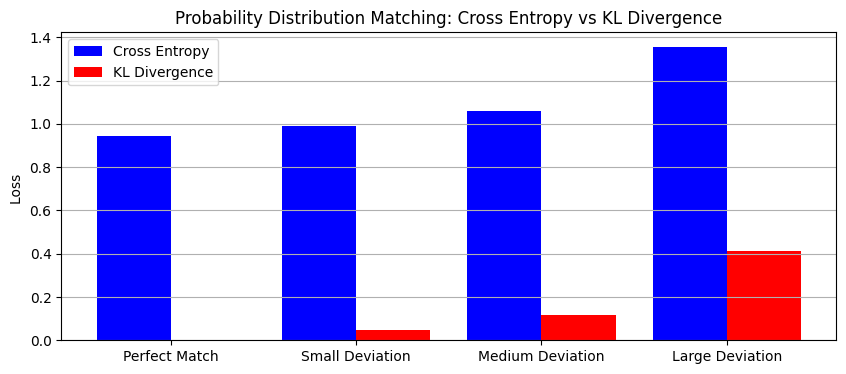

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 Cross Entropy 函數
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)

    # 避免 q 為 0，導致 log(0) 問題
    q = np.clip(q, 1e-10, 1)

    # 計算 KL Divergence，僅當 p > 0 才計算 log(p/q)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))



###  情境 1：分類問題（單一標籤） ###
# 假設真實標籤是類別 0
p_classification = np.array([1, 0])  # One-hot 編碼

# 讓模型的預測 q 逐漸從錯誤趨近正確
q_values = np.linspace(0.01, 0.99, 50)  # 避免 log(0) 問題
ce_classification = [cross_entropy(p_classification, [q, 1-q]) for q in q_values]
kl_classification = [kl_divergence(p_classification, [q, 1-q]) for q in q_values]

# 繪圖：Cross Entropy & KL Divergence 在分類問題中的變化
plt.figure(figsize=(6,4))
plt.plot(q_values, ce_classification, label="Cross Entropy", color='blue')
plt.plot(q_values, kl_classification, label="KL Divergence", color='red')
plt.xlabel("x value (q=[x, 1-x])")
plt.ylabel("Loss ")
plt.title("Classification Problem (Single Label): Cross Entropy vs KL Divergence (p = [1,0])")
plt.legend()
plt.grid()
plt.show()


###  情境 2：機率分布匹配問題 ###
# 定義真實分布
p_distribution = np.array([0.1, 0.4, 0.5])

# 測試不同的預測機率分布 q（從接近到差異大）
q_list = [
    np.array([0.1, 0.4, 0.5]),  # 完全相同
    np.array([0.2, 0.3, 0.5]),  # 小幅偏差
    np.array([0.3, 0.3, 0.4]),  # 中等偏差
    np.array([0.5, 0.3, 0.2])   # 差異極大
]

ce_distribution = [cross_entropy(p_distribution, q) for q in q_list]
kl_distribution = [kl_divergence(p_distribution, q) for q in q_list]

# 顯示數值比較
for i, q in enumerate(q_list):
    print(f"q 分布: {q}, Cross Entropy: {ce_distribution[i]:.4f}, KL Divergence: {kl_distribution[i]:.4f}")

# 繪圖：Cross Entropy & KL Divergence 在機率分布匹配問題中的變化
plt.figure(figsize=(10,4))
x_labels = ["Perfect Match", "Small Deviation", "Medium Deviation", "Large Deviation"]
x = np.arange(len(q_list))
plt.bar(x - 0.2, ce_distribution, 0.4, label="Cross Entropy", color='blue')
plt.bar(x + 0.2, kl_distribution, 0.4, label="KL Divergence", color='red')
plt.xticks(x, x_labels)
plt.ylabel("Loss ")
plt.title("Probability Distribution Matching: Cross Entropy vs KL Divergence")
plt.legend()
plt.grid(axis="y")
plt.show()


## 🎯 Cross Entropy vs KL Divergence 實驗結果分析

我們透過兩個實驗來觀察 **Cross Entropy（交叉熵）** 和 **KL Divergence（KL 散度）** 在不同情境下的行為。

---

## 📌 **實驗 1：分類問題（單一標籤）**

在分類問題中，真實標籤 \( p \) 採用 **One-hot 編碼**（如 `[1, 0]` 代表類別 0），並測試當模型預測 \( q \) 從錯誤趨近正確時，Cross Entropy 和 KL Divergence 的變化。

### 🔍 **發現**
- **Cross Entropy 隨著預測 \( q \) 趨近真實標籤而減小**，這符合深度學習中使用 Cross Entropy 作為分類 Loss 的目的。
- **KL Divergence 與 Cross Entropy 數值相同**，因為當 \( p \) 為 One-hot 時，兩者公式相等：
  $$
  D_{KL}(p || q) = -\sum p(x) \log q(x) = H(p, q)
  $$
  這說明 **在分類問題中，使用 KL Divergence 計算 Loss 並不會帶來額外的資訊，Cross Entropy 已經足夠！**
  
### ✅ **結論**
- **Cross Entropy 是分類問題中的最佳選擇，因為它直接衡量預測誤差，並能有效指導梯度下降。**
- **KL Divergence 在 One-hot 標籤下與 Cross Entropy 相同。**

---

## 📌 **實驗 2：機率分布匹配（適用於機率模型）**

這個實驗測試了當我們希望讓一個機率分布 \( q \) 逼近目標分布 \( p \) 時，Cross Entropy 和 KL Divergence 如何變化。

### 🔍 **發現**
- **當 \( q \) 完全等於 \( p \) 時：**
  - **KL Divergence = 0**，表示兩個分布完全相同，沒有額外的信息差異。
  - **Cross Entropy 等於 Entropy(p)**，即 \( H(p, p) \)。
  
- **當 \( q \) 偏離 \( p \) 時：**
  - **Cross Entropy 增加**，因為錯誤預測增加。
  - **KL Divergence 也會增加，但比 Cross Entropy 更敏感**，特別是在某些機率接近 0 的情況下，KL 可能會大幅上升。
  
### ✅ **結論**
- **KL Divergence 是衡量機率分布相似性的最佳指標**，適用於機率模型（如 **GAN、VAE、語音模型**）。
- **Cross Entropy 仍然可用於機率模型，但它包含了真實分布 \( p \) 的熵，因此無法準確衡量分布的「相對差異」。**

---

## 🚀 **總結對比**
| **應用場景** | **Cross Entropy** | **KL Divergence** | **哪個比較適合？** |
|-------------|-----------------|-----------------|----------------|
| **分類問題（影像分類、文本分類）** | ✅ 測量分類錯誤率 | ⚠ 幾乎相同，不推薦使用 | **Cross Entropy** |
| **機率分布匹配（GAN、VAE、語音模型）** | ⚠ 包含 Entropy(p)，影響學習 | ✅ 衡量兩分布相似度 | **KL Divergence** |

---

## 🔥 **最終結論**
- **Cross Entropy 適合分類問題，因為它能直接指導梯度下降來改善預測準確度。**
- **KL Divergence 適合機率模型，因為它能準確衡量分布的相似度，讓模型學習更接近真實分布。**
- **在分類問題中，KL Divergence = Cross Entropy，因此通常不使用 KL 作為 Loss。**
- **在機率匹配問題（如 GAN、VAE）中，KL Divergence = 0 代表兩個分布相等，這是最理想的狀態！**


